## Stability - using barycentric interpolation

In [4]:
using CairoMakie

# Barycentric interpolation and background information

The barycentric formula is:
```math
```

# Basis - ```j_eval_cheby2``` and ```j_eval``` functions

For interpolation points/nodes, $x_j$, and some new points $x_i$, that you want to find $f(x_i)$. The ```j_eval_cheby2``` and ```j_eval``` functions are used to find the matrix 
```math
E_{ij}=\ell_j(x_i)
```
such that 
```math
\textbf{f}(\textbf{x}_i)=\frac{E *\textbf{f}}{E *\mathbf{1}}
```
The ```j_eval_cheby2``` function only uses $x_j$ values of Chebyshev points of the second kind, whose formula are:

```math
x_j=\cos \frac{j \pi}{n}, j=0,...,n

```
They have the explicit weight formula: 
```math
w_j=(-1)^j \delta_j,
\delta_j=
\begin{cases}
\frac{1}{2}, & \text{j=0 or j=n}\\
1, & \text{otherwise}
\end{cases}
```
So the function ```j_eval_cheby2``` finds the matrix $E$ for nodes that are Chebyshev points of the 2nd kind and only take points $x_j$ that are in this form.

The  ```j_eval``` function finds the matrix $E$ but does so for any points given by the user by finding the weights given the interpolation points $x_j$.

We'll try with using a function $f(x)=\cos(x)$, where we want the value of $\cos(0.5)$ and $\cos(0.75)$ (our $x_i$ are 0.5 and 0.75)

We'll first demonstrate with use the function ```j_eval_chevy2```:

In [5]:
include("j_eval_cheby2.jl")
n=200 #so we have 201 interpolation/Chebyshev points
xjvals=cos.(pi*(0:n)'/n)[:] #interpolation points in the form of chebyshev points of the 2nd kind
xivals=[0.5,0.75] #points you want to evaluate at
fvec=cos.(xjvals)[:]#fj values 
vec1=repeat([1],n+1)

emat=j_eval_cheby2(xjvals,xivals) #E matrix of lj(xi) components
fxivals=(emat*fvec)./(emat*vec1) #uses barycentric interpolation formula to find p(xivals)

2-element Vector{Float64}:
 0.8775825618903724
 0.7316888688738205

Now we'll demonstrate with the use of function ```j_eval```:

In [ ]:
include("j_eval.jl")
emat2=j_eval(xjvals,xivals) #E matrix of lj(xi) components
fxivals2=(emat2*fvec)./(emat2*vec1)

2-element Vector{Float64}:
 0.8775825618903733
 0.7316888688738209

In [9]:
#To check my function works we'll find the true value of f(xivals)
cos.([0.5,0.75])

2-element Vector{Float64}:
 0.8775825618903728
 0.7316888688738209

Another example:
```math
f(x)=|x|+\frac{x}{2} -x^2
```

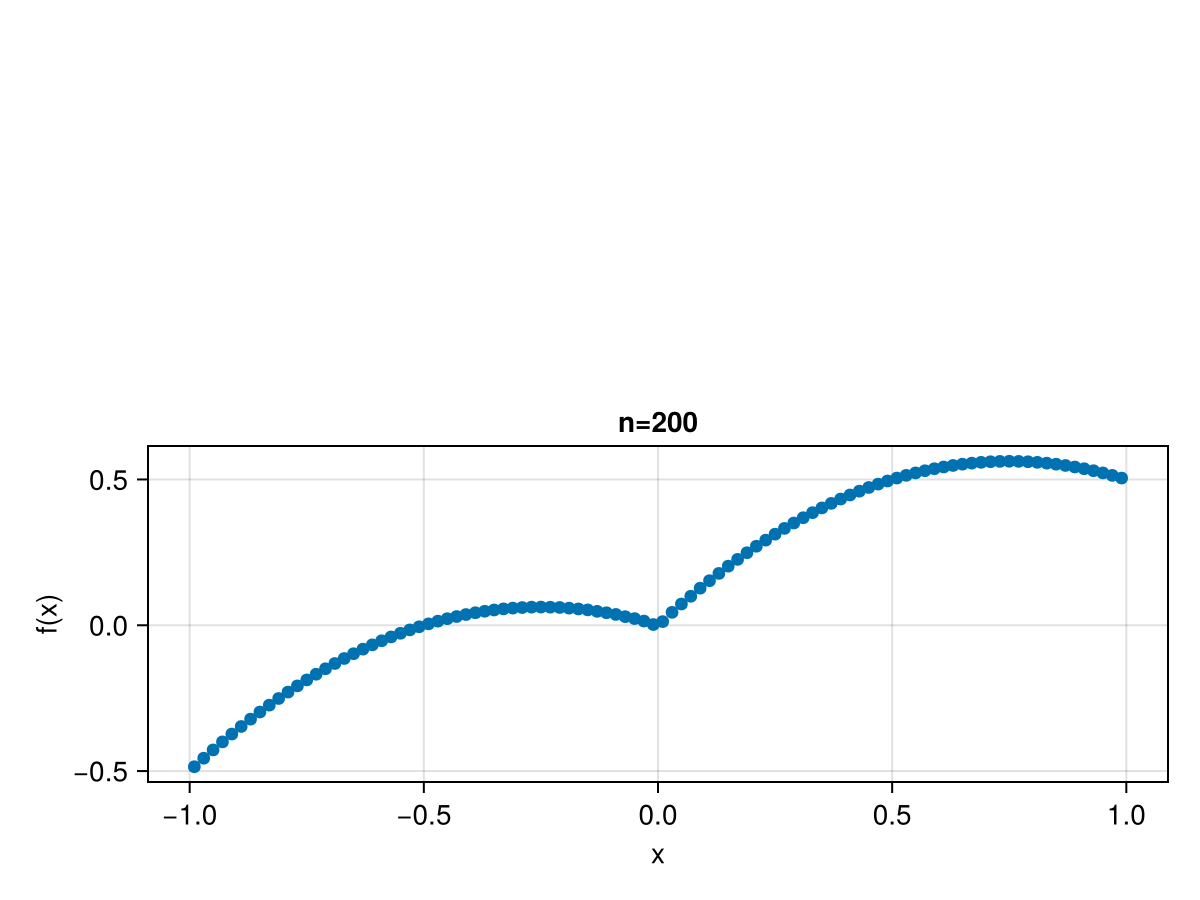

In [11]:
include("binter_example.jl")
xivals2=[-0.99:0.02:0.99;]
fvec2=binter_example(xjvals) #(xivals2)

emat3=j_eval_cheby2(xjvals,xivals2) #E matrix of lj(xi) components
fxivals3=(emat3*fvec2)./(emat3*vec1)

fig1=Figure()
ax1=Axis(fig1[2,1],xlabel="x",ylabel="f(x)",title="n=200") #Axis(fig1[1,1],xlabel="x",ylabel="f(x)",title="n=200")
scatter!(ax1,xivals2,fxivals3)
fig1


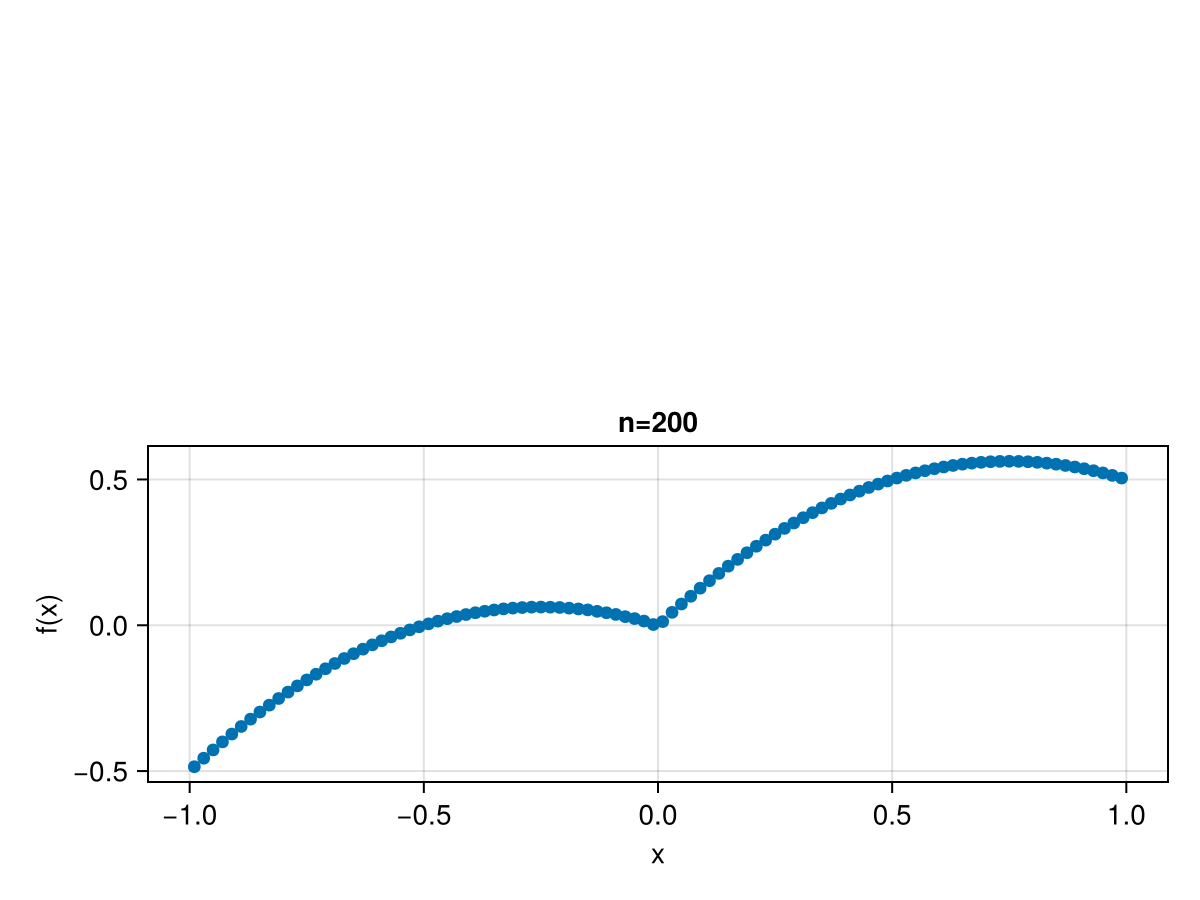

In [12]:
emat4=j_eval(xjvals,xivals2) #E matrix of lj(xi) components
fxivals4=(emat4*fvec2)./(emat4*vec1)

fig2=Figure()
ax2=Axis(fig2[2,1],xlabel="x",ylabel="f(x)",title="n=200") #Axis(fig1[1,1],xlabel="x",ylabel="f(x)",title="n=200")
scatter!(ax2,xivals2,fxivals3)
fig2
